In [3]:
%config IPCompleter.greedy=True

In [4]:
import pandas as pd 
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
data_frame = pd.read_csv("Pokemon.csv")

In [6]:
data_frame.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


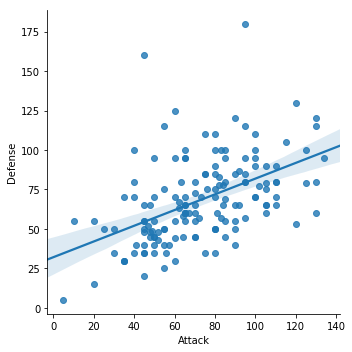

In [7]:
# Scatter plot
# lmplot ------> Plot data and regression model fits across a FacetGrid.
sns.lmplot(x = 'Attack', y = 'Defense', data = data_frame)

(0, 141.98905736873428)

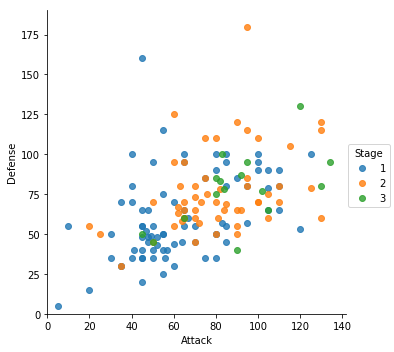

In [8]:
# scatter plot with arguments
# Seaborn doesn't have dedicated plot function and lmplot is a function for
# fitting and plotting a regression line. 

# fit_reg = False ----> No regression line

sns.lmplot(x = 'Attack', y = 'Defense', data = data_frame,fit_reg = False, hue = 'Stage')

# Set axes limits  ---- Using matplotlib

plt.ylim(0, None)
plt.xlim(0, None)

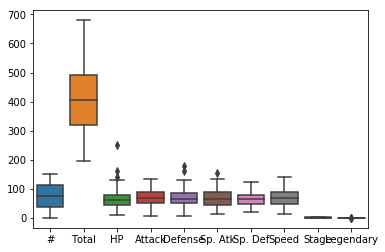

In [9]:
# Boxplot
sns.boxplot(data = data_frame)

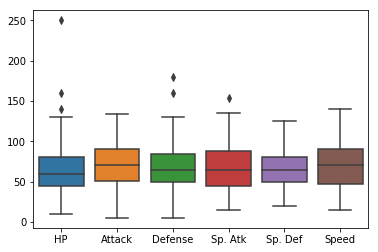

In [10]:
# create a new data frame by eliminating certain features

box_df = data_frame.drop(['#','Total', 'Stage', 'Legendary'], axis = 1)
sns.boxplot(data = box_df)

In [11]:
# can use our own colors for plotting
colors = [          '#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

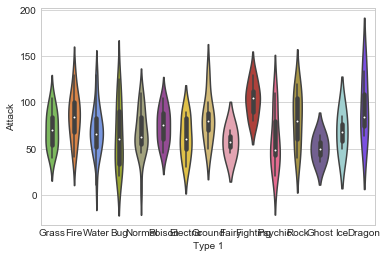

In [12]:
# Violin Plots -----> show's distribution
# change Theme
sns.set_style('whitegrid')
sns.violinplot(x = 'Type 1', y = 'Attack', palette = colors,data = data_frame)

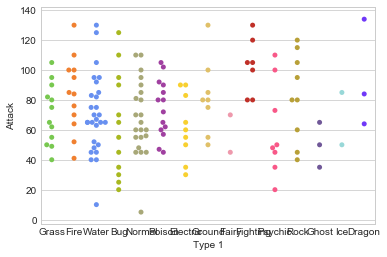

In [13]:
# Swarm plots -----> shows each while sracking those with similar values
# swarm and viloin plots display same information
sns.swarmplot(x = 'Type 1', y = 'Attack', data = data_frame, palette = colors)

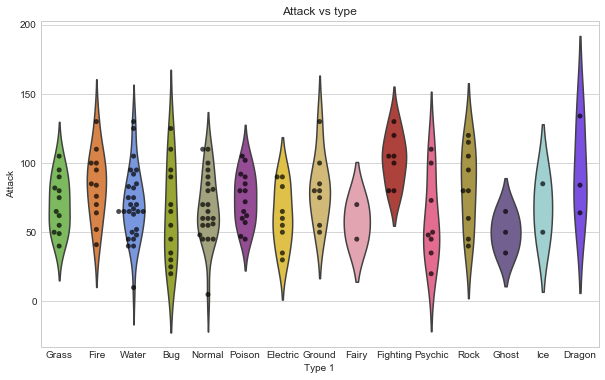

In [14]:
# Overlaying plots

# set figure size
plt.figure(figsize = (10,6))

sns.violinplot(x = 'Type 1', y = 'Attack', data = data_frame,
              inner = None, palette = colors)

sns.swarmplot(x = 'Type 1', y = 'Attack', data = data_frame,
              color = 'k', alpha = 0.7)

plt.title('Attack vs type')


In [18]:
# Melt some parts of DF into one column
# inputs are : 1) DF to melt
#              2) Vars to keep (not to melt)
#              3) Name for new melted var
melt_df = pd.melt(box_df, id_vars = ['Name', 'Type 1', 'Type 2'],
                 var_name = 'Stat')
melt_df.head()

,Name,Type 1,Type 2,Stat,value
0,Bulbasaur,Grass,Poison,HP,45
1,Ivysaur,Grass,Poison,HP,60
2,Venusaur,Grass,Poison,HP,80
3,Charmander,Fire,NaN,HP,39
4,Charmeleon,Fire,NaN,HP,58


In [21]:
print(box_df.shape)
print(melt_df.shape)

(151, 9)
(906, 5)


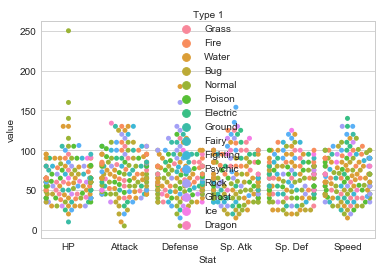

In [23]:
# Swarm plot with melted DF
sns.swarmplot(x = 'Stat', y = 'value', data = melt_df, hue = 'Type 1')

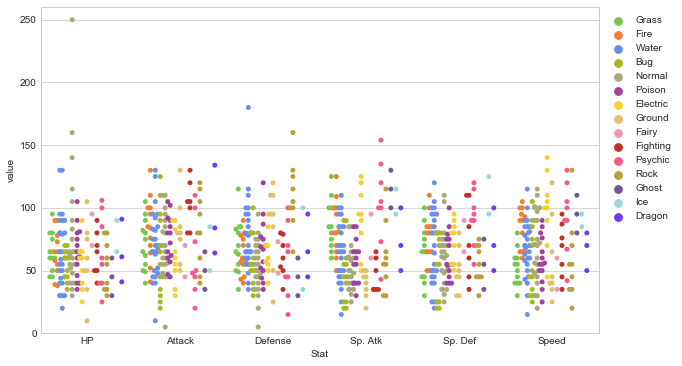

In [25]:
# Above plot looks  awful!
# let's make good chart
plt.figure(figsize = (10, 6))
sns.swarmplot(x = 'Stat', y = 'value', data = melt_df, hue = 'Type 1',
             dodge = True, palette = colors)
plt.ylim(0, 260)
plt.legend(bbox_to_anchor = (1,1), loc = 2)

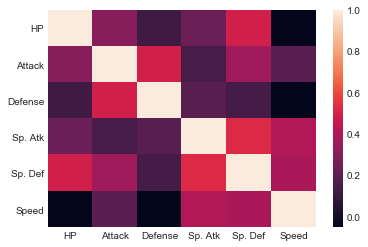

In [27]:
# Heatmap ------> Visualoize matrix like data
# Find correlations
corr = box_df.corr()
# heat-map
sns.heatmap(corr)

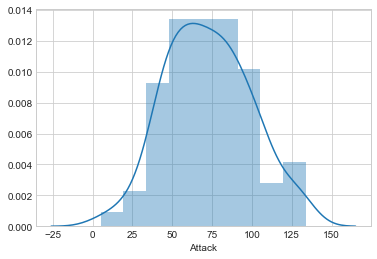

In [28]:
# Histogram
# Distribution plot a.k.a Histogram
sns.distplot(data_frame.Attack)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

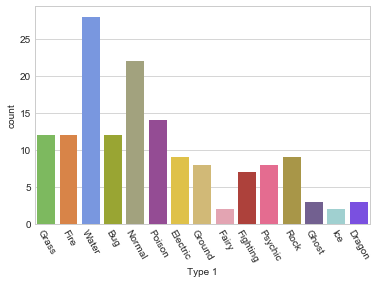

In [30]:
# Barplot
# Count plot a.k.a Barplot
sns.countplot(x = 'Type 1', data = data_frame, palette = colors)
# Rotate x-labels
plt.xticks(rotation = -60)

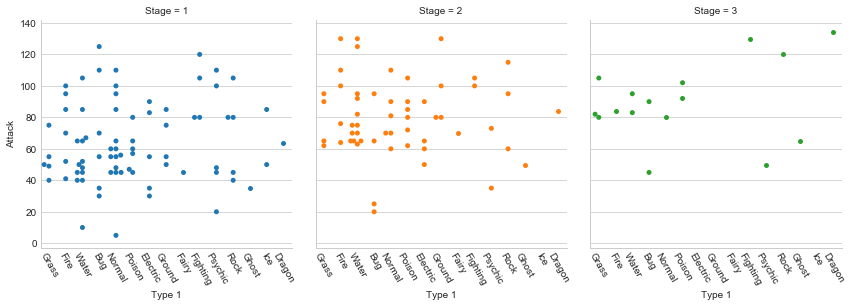

In [33]:
# Factor plot ------> makes easy to separate plots by categorical classes
g = sns.factorplot(x = 'Type 1', y = 'Attack', data = data_frame,
                  hue = 'Stage', col = 'Stage', kind = 'swarm')

# Rotate x-labels
g.set_xticklabels(rotation = -60)

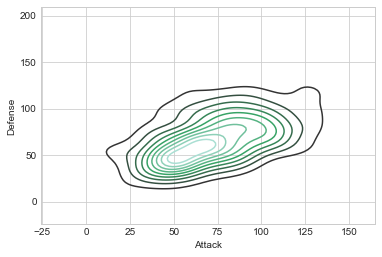

In [34]:
# Density plot ------> displays distribution between two variables
sns.kdeplot(data_frame.Attack, data_frame.Defense)

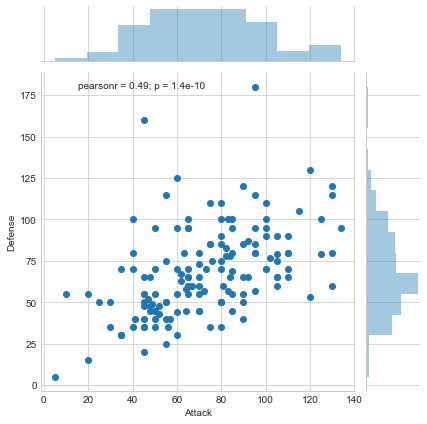

In [36]:
# Joint distribution plot ------> Detailed info avout bi-variate distributions
sns.jointplot(x = 'Attack', y = 'Defense', data = data_frame)